## 5 qubits GHZ state

## Machine Topology
![ibmq Belem topology](./ibmq_belem_topology.png)

## Circuit
![circuit](./circuit.png)

---

6


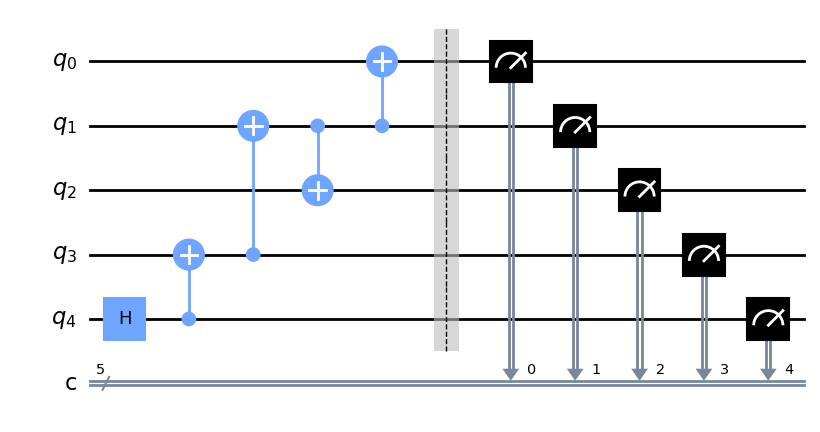

In [25]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, transpile

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[4])
circuit.cx(qreg_q[4], qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[0])

circuit.barrier()

circuit.measure(qreg_q, creg_c)
print(circuit.depth())
display(circuit.draw("mpl"))

In [2]:
sim = Aer.get_backend("aer_simulator")
results = sim.run(circuit).result()

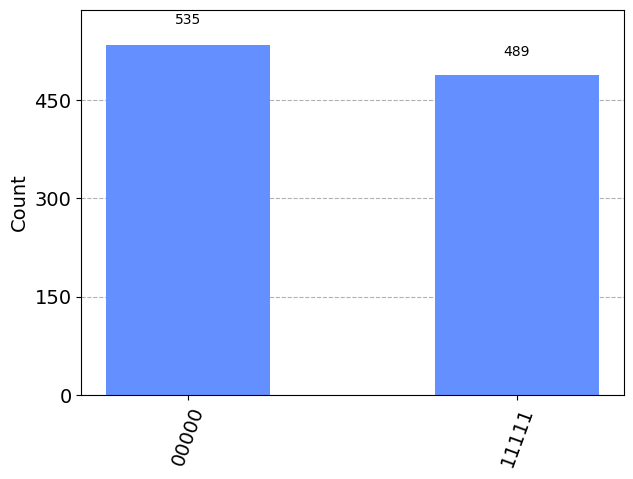

In [3]:
from qiskit.visualization import plot_histogram
plot_histogram(results.get_counts())

In [22]:
from qiskit_ibm_provider import IBMProvider

In [14]:
import os
from dotenv import load_dotenv
load_dotenv()

IBMProvider.save_account(token=os.getenv('IBM_API_TOKEN'))

AccountAlreadyExistsError: 'Named account (default-ibm-quantum) already exists. Set overwrite=True to overwrite.'

In [23]:
provider = IBMProvider()
print(provider.backends())

[<IBMBackend('simulator_stabilizer')>, <IBMBackend('ibm_nairobi')>, <IBMBackend('ibm_perth')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('ibmq_quito')>, <IBMBackend('ibmq_belem')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_statevector')>, <IBMBackend('ibmq_jakarta')>, <IBMBackend('ibmq_lima')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('ibmq_manila')>, <IBMBackend('ibm_lagos')>]


In [24]:
machine = provider.get_backend('ibmq_belem')

In [21]:
circuit_transpiled = transpile(circuit, backend=machine)
job = machine.run(circuit_transpiled, shots=1024)

In [35]:
job.status()

NameError: name 'job' is not defined

## OUTCOME
![outcome](./outcome.png)

In [62]:
job = provider.backend.jobs()[0]
real_machine_results = job.result().get_counts()
real_machine_results, sum(list(real_machine_results.values()))

({'00000': 479,
  '00001': 8,
  '10000': 11,
  '10100': 2,
  '10101': 3,
  '10110': 3,
  '10111': 36,
  '11000': 3,
  '11011': 30,
  '11101': 30,
  '11110': 18,
  '11111': 338,
  '00010': 4,
  '00011': 3,
  '00100': 3,
  '00110': 1,
  '00111': 5,
  '01000': 8,
  '01010': 1,
  '01011': 3,
  '01110': 2,
  '01111': 33},
 1024)

In [75]:
total_shots = 1024
percentage = lambda x : (x / total_shots) * 100

expected_results = sum([real_machine_results['00000'], real_machine_results['11111']])
wrong_results = total_shots - expected_results

expected_results, wrong_results, percentage(expected_results), percentage(wrong_results)

(817, 207, 79.78515625, 20.21484375)